In [195]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [261]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [197]:
df = pd.read_csv('/content/drive/Shareddrives/data-project2/Data/earthnull/cleaned_data_new2.csv')

In [198]:
df

,Unnamed: 0,lat,long,date_time,temp,RH,pm25,pm10,wind_dir,wind_speed,stationIDs,stationID,province,station_name,zone
0,0,19.909242,99.823357,2020-01-01 07:00:00,15.5,98.0,18.0,26.0,150.0,19.0,57t,1,เชียงราย,ต.เวียง,N
1,1,18.790920,98.988106,2020-01-01 07:00:00,16.9,94.0,26.0,37.0,130.0,26.0,36t,2,เชียงใหม่,ต.ศรีภูมิ,N
2,2,18.282664,99.659873,2020-01-01 07:00:00,18.4,86.0,14.0,20.0,125.0,31.0,40t,3,ลำปาง,ต.แม่เมาะ,N
3,3,19.200226,99.893048,2020-01-01 07:00:00,16.3,98.0,16.0,23.0,135.0,29.0,70t,4,พะเยา,ต.บ้านต๋อม,N
4,4,18.788878,100.776359,2020-01-01 07:00:00,16.8,88.0,26.0,38.0,125.0,27.0,67t,5,น่าน,ต.ในเวียง,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512251,512251,13.588554,101.286359,2022-01-01 06:00:00,21.1,69.0,8.0,13.0,65.0,26.0,60t,25,ฉะเชิงเทรา,ต.วังเย็น,E
512252,512252,13.355065,100.977777,2022-01-01 06:00:00,22.4,65.0,11.0,17.0,60.0,27.0,34t,26,ชลบุรี,ต.บ้านสวน,E
512253,512253,13.054551,101.098128,2022-01-01 06:00:00,21.0,71.0,7.0,11.0,60.0,25.0,33t,27,ชลบุรี,ต.บ่อวิน,E
512254,512254,12.706325,101.180975,2022-01-01 06:00:00,23.2,69.0,6.0,10.0,65.0,24.0,74t,28,ระยอง,ต.เนินพระ,E


In [199]:
df = df.drop(columns='Unnamed: 0')

In [200]:
df['zone'] = df['zone'].replace(['N','NE','C','E','W','S'],[1,2,3,4,5,6])

In [201]:
# station_id = ['57t', '36t', '40t', '70t', '67t', '91t', '90t', '46t', 'o20', 'm1', '47t', 'o32', '41t', '86t', '42t', '44t', '89t', '93t', '63t', '50t', 'bkp89t', 'bkp78t', 'bkp56t', '19t', '60t', '34t', '33t', '74t', '87t']
# df['stationID'] = df['stationID'].replace(station_id,[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29])

In [202]:
df = df.sort_values(by=['date_time','stationID'], ascending=True)

In [203]:
df = df.drop_duplicates()

In [204]:
df = df.drop(3480)

In [205]:
df.shape

(508776, 14)

In [206]:
df_train = df[360000:460000]
df_val = df[460000:470000]
df_test = df[470000:]

In [207]:
df_train = df_train.sort_values(by=['stationID','date_time'], ascending=True)
df_val = df_val.sort_values(by=['stationID','date_time'], ascending=True)
df_test = df_test.sort_values(by=['stationID','date_time'], ascending=True)

Select Feature

In [208]:
selected_df_train = df_train[['temp','RH','pm25','wind_dir','wind_speed','stationID','zone']]
selected_df_val = df_val[['temp','RH','pm25','wind_dir','wind_speed','stationID','zone']]
selected_df_test = df_test[['temp','RH','pm25','wind_dir','wind_speed','stationID','zone']]

#Outlier

In [209]:
def find_iqr(column,df):

  q1_age = df[column].quantile(0.25)
  q3_age = df[column].quantile(0.75)
  return q3_age-q1_age

In [210]:
def findmin(iqr,q1):
  return q1-1.5*iqr
def findmax(iqr,q3):
  return q3+1.5*iqr

In [211]:
def replace_outlier(feature,df): 
  
  for i in range(len(feature)):
    print(feature[i])
    max = findmax(find_iqr(feature[i],df),df[feature[i]].quantile(0.75))
    min = findmin(find_iqr(feature[i],df),df[feature[i]].quantile(0.25))
    if(min < 0): min = 0
    print(min,max)
    
    df[feature[i]].mask(df[feature[i]] > max, max, inplace=True)
    df[feature[i]].mask(df[feature[i]] < min, min, inplace=True)
  return df

In [212]:
feature = ['temp','RH','pm25','wind_dir','wind_speed']
train_df_r_outlier = replace_outlier(feature, selected_df_train)
val_df_r_outlier = replace_outlier(feature, selected_df_val)

temp
18.049999999999997 35.25
RH
42.5 118.5
pm25
0 34.5
wind_dir
95.0 375.0
wind_speed
0 62.0
temp
17.349999999999998 33.75
RH


/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:8870: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


51.0 115.0
pm25
0 39.5
wind_dir
15.0 175.0
wind_speed
0 42.0


#MinMaxScale

Combine train and validation for scale

In [214]:
train_df_for_scale = pd.concat([train_df_r_outlier, val_df_r_outlier], join="inner")

In [215]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
train_val_df_scale = scaler.fit_transform(train_df_for_scale)
test_df_scale = scaler.transform(selected_df_test)

Save scaler

In [304]:
import joblib
scaler_filename = "/content/scaler.save"
joblib.dump(scaler, scaler_filename)

['/content/scaler.save']

In [216]:
test_df_scale.shape

(38776, 7)

Extract train and validation

In [217]:
train_df_scale = train_val_df_scale[:train_df_r_outlier.shape[0]]
val_df_scale = train_val_df_scale[train_df_r_outlier.shape[0]:]

In [218]:
val_df_scale.shape

(10000, 7)

In [219]:
# small_train_df_scale = train_df_scale[200000:]

In [220]:
y_scaler = MinMaxScaler()
y_scaler.fit(np.array(train_df_for_scale['pm25']).reshape(-1,1))

MinMaxScaler()

Save y_scaler

In [305]:
scaler_filename = "/content/y_scaler.save"
joblib.dump(y_scaler, scaler_filename) 

['/content/y_scaler.save']

#Preprocess for LSTM

In [227]:
X_data = []
y_data = []

for i in range(72,train_df_scale.shape[0]-72):
    if train_df_scale[i, 5] != train_df_scale[i+1, 5] and train_df_scale[i-24, 5] == train_df_scale[i, 5] and train_df_scale[i+1, 5] != train_df_scale[i+72, 5]:
        continue
    X_data.append(train_df_scale[i-72:i])
    y_data.append(train_df_scale[i:i+24, 2])

X_data, y_data = np.array(X_data), np.array(y_data)

In [228]:
X_val = []
y_val = []

for i in range(72,val_df_scale.shape[0]-72):
    if val_df_scale[i, 5] != val_df_scale[i+1, 5] and val_df_scale[i-24, 5] == val_df_scale[i, 5] and val_df_scale[i+1, 5] != val_df_scale[i+72, 5]:
        continue
    X_val.append(val_df_scale[i-72:i])
    y_val.append(val_df_scale[i:i+24, 2])

X_val, y_val = np.array(X_val), np.array(y_val)

In [231]:
X_test = []
X_test_time = []
X_test_city = []
y_test = np.array([1]*24).reshape(1,-1)

for i in range(72, test_df_scale.shape[0]):
    if selected_df_test.iloc[i-72]['stationID'] != selected_df_test.iloc[i]['stationID']:
        continue
    X_test.append(test_df_scale[i-72:i])
    temp = selected_df_test['pm25'][i:i+24].to_numpy().reshape(1,-1)
    if(temp.shape[1]!=24):
      continue
    y_test = np.vstack((y_test,temp))
X_test = np.array(X_test)
y_test

array([[1., 1., 1., ..., 1., 1., 1.],
       [7., 7., 7., ..., 7., 7., 7.],
       [7., 7., 7., ..., 7., 7., 7.],
       ...,
       [6., 6., 1., ..., 7., 8., 8.],
       [6., 1., 2., ..., 8., 8., 8.],
       [1., 2., 2., ..., 8., 8., 8.]])

In [233]:
y_test = y_test[1:]

#Model

In [294]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

In [295]:
#create callback

# change the file name here 
filepath = 'new_modelLSTM_pun8.hdf5'

checkpoint = ModelCheckpoint(filepath=filepath, 
                             monitor='val_loss',
                             verbose=0, 
                             save_best_only=True,
                             mode='min')

# earlystopping = EarlyStopping(
#     monitor='val_loss', 
#     patience=5, 
#     min_delta=0, 
#     mode='auto'
# )

reduce_lr = ReduceLROnPlateau(
    monitor='loss', 
    factor=0.2,   
    patience=2, 
    min_lr=0.001,
    verbose=0
)
callbacks = [checkpoint, reduce_lr]

In [297]:
model = Sequential()
model.add(LSTM(units=100, activation= "relu", return_sequences=True,
               input_shape = (X_data.shape[1], X_data.shape[2])))
model.add(Dropout(0.4))
model.add(LSTM(units= 50, return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(units= 50))
model.add(Dense(units = 24 , activation="relu"))  

In [298]:
model.compile(optimizer='adam', 
              loss = 'mean_squared_error')

In [299]:
history = model.fit(X_data, 
          y_data, 
          epochs=15,
          batch_size=256,
          verbose=1,
          callbacks=callbacks,
          validation_data = (X_val, y_val)
          )

Epoch 1/15
391/391 [==============================] - 237s 593ms/step - loss: 0.0273 - val_loss: 0.0259 - lr: 0.0010
Epoch 2/15
391/391 [==============================] - 234s 599ms/step - loss: 0.0182 - val_loss: 0.0259 - lr: 0.0010
Epoch 3/15
391/391 [==============================] - 234s 598ms/step - loss: 0.0165 - val_loss: 0.0289 - lr: 0.0010
Epoch 4/15
391/391 [==============================] - 234s 599ms/step - loss: 0.0172 - val_loss: 0.0319 - lr: 0.0010
Epoch 5/15
391/391 [==============================] - 234s 599ms/step - loss: 0.0162 - val_loss: 0.0257 - lr: 0.0010
Epoch 6/15
391/391 [==============================] - 230s 587ms/step - loss: 0.0149 - val_loss: 0.0261 - lr: 0.0010
Epoch 7/15
391/391 [==============================] - 231s 590ms/step - loss: 0.0142 - val_loss: 0.0268 - lr: 0.0010
Epoch 8/15
391/391 [==============================] - 235s 601ms/step - loss: 0.0133 - val_loss: 0.0288 - lr: 0.0010
Epoch 9/15
391/391 [==============================] - 234s 599ms

In [300]:
def plot_loss (history, model_name):
    plt.figure(figsize = (10, 6))
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Train vs Validation Loss for ' + model_name)
    plt.ylabel('Loss')
    plt.xlabel('epoch')
    plt.legend(['Train loss', 'Validation loss'], loc='upper right')

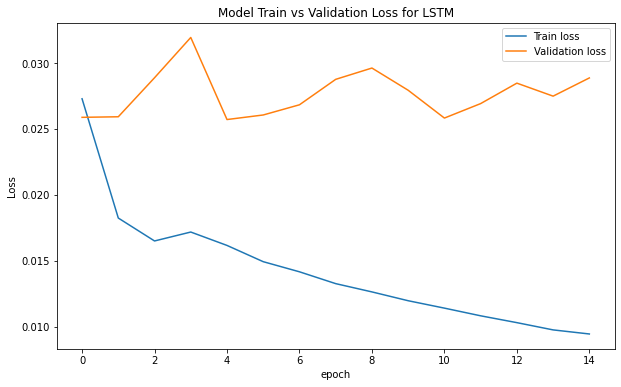

In [301]:
plot_loss (history, 'LSTM')

Save Model

In [303]:
model.save("/content/model.h5")

In [302]:
predicted = model.predict(X_test)

In [279]:
predicted.shape

(36688, 24)

In [280]:
predicted = predicted[:36665]

In [281]:
predicted.shape

(36665, 24)

In [282]:
y_test.shape

(879960, 1)

In [283]:
predicted = predicted.reshape(-1,1)
y_test = y_test.reshape(-1,1)

In [284]:
y_test.shape

(879960, 1)

In [285]:
sol = y_scaler.inverse_transform(np.array(predicted).reshape(-1,1))

In [286]:
sol.shape

(879960, 1)

In [287]:
y_test.shape

(879960, 1)

In [288]:
sol.shape

(879960, 1)

In [289]:
from sklearn.metrics import mean_squared_error
import math

In [290]:
MSE = mean_squared_error(y_test,sol)
RMSE = math.sqrt(MSE)

In [291]:
RMSE

17.377263969131032